# Regressors for Symptoms $\rightarrow$ Disease

#### Import dataset

In [6]:
from create_datasets import SymptomDiseaseData
data = SymptomDiseaseData()
train, val, test, train_y, val_y, test_y = data.generate_data()
data.get_data_insight()

Symptom's shape: (890, 18)
Disease's shape: (890, 3)
Symptoms at index 0:
 [ 0 10  0  0  0  0  0  3  0  2  1  0  0  0  0  0  1  0]
Disease at index 0:
 [  7   0 136]


#### Import things always needed

In [7]:
import numpy as np
import matplotlib.pyplot as plt

#### MLP

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(100, input_dim=18))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('relu')) # may take out and test later...
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

model.fit(train, train_y, epochs=250, batch_size=32, validation_data=(val, val_y))


# pred = model.predict(test)
# for i in range(5):
#     print(pred[i])
#     print('\n', test_y[i])

Train on 623 samples, validate on 133 samples
Epoch 1/250
623/623 [==============================] - 0s - loss: 5043894.2574 - acc: 0.4382 - val_loss: 2223001.2603 - val_acc: 0.8271
Epoch 2/250
623/623 [==============================] - 0s - loss: 4247557.8876 - acc: 0.8475 - val_loss: 2052558.7039 - val_acc: 0.8421
Epoch 3/250
623/623 [==============================] - 0s - loss: 4076419.3561 - acc: 0.8379 - val_loss: 1981848.1772 - val_acc: 0.8346
Epoch 4/250
623/623 [==============================] - 0s - loss: 3940961.7701 - acc: 0.8459 - val_loss: 1924240.8313 - val_acc: 0.8421
Epoch 5/250
623/623 [==============================] - 0s - loss: 3866045.1970 - acc: 0.8443 - val_loss: 1880056.7754 - val_acc: 0.8571
Epoch 6/250
623/623 [==============================] - 0s - loss: 3827570.9410 - acc: 0.8604 - val_loss: 1859189.4807 - val_acc: 0.8722
Epoch 7/250
623/623 [==============================] - 0s - loss: 3798253.1100 - acc: 0.8700 - val_loss: 1835802.0475 - val_acc: 0.8722
Ep

1207909.9976448123


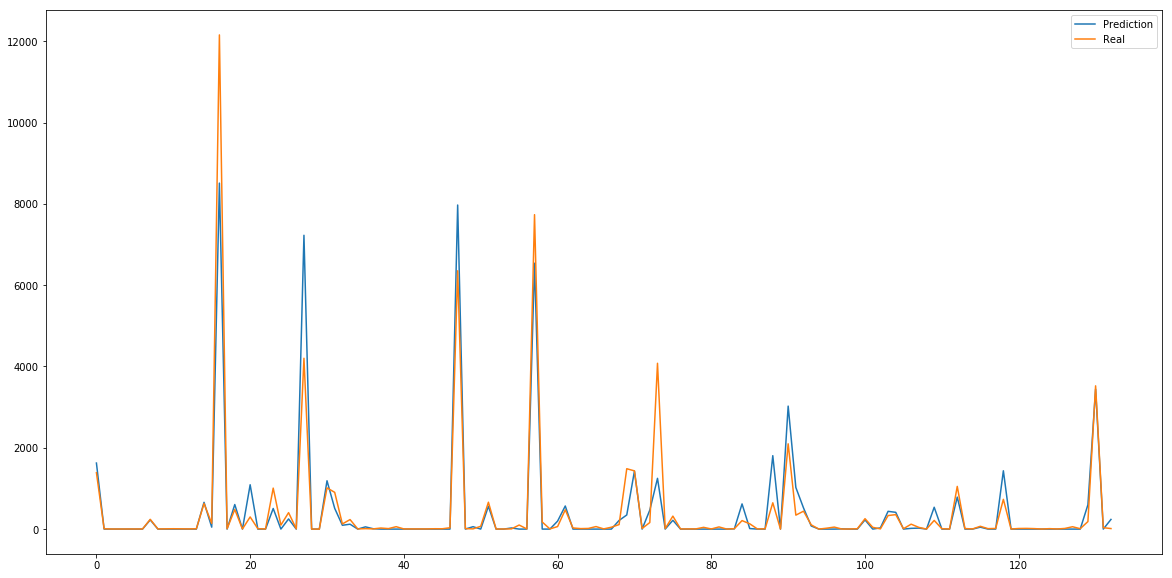

In [31]:
pred = model.predict(val)
print(np.mean((val_y-pred)**2))

plt.figure(figsize=(20,10))
plt.plot(pred.T[0], label='Prediction')
plt.plot(val_y.T[0], label='Real')
plt.legend()
plt.show()

## SCORE: ;ljasf;dlakjsdf;lakjsdf

#### Random Forest Regressor

Regressing with 9 features...
689966.0112288162


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


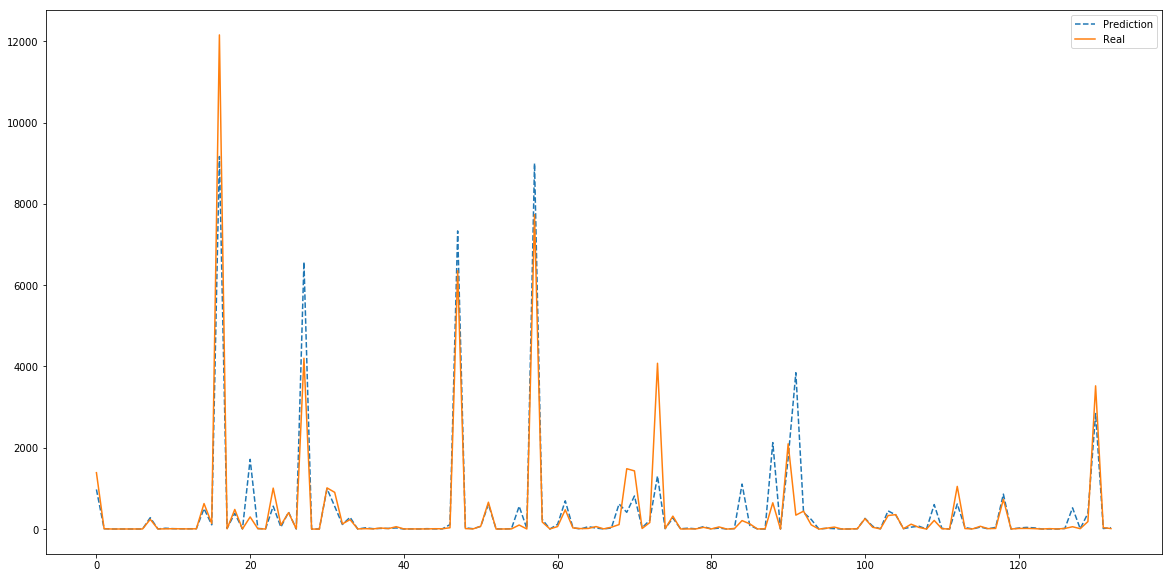

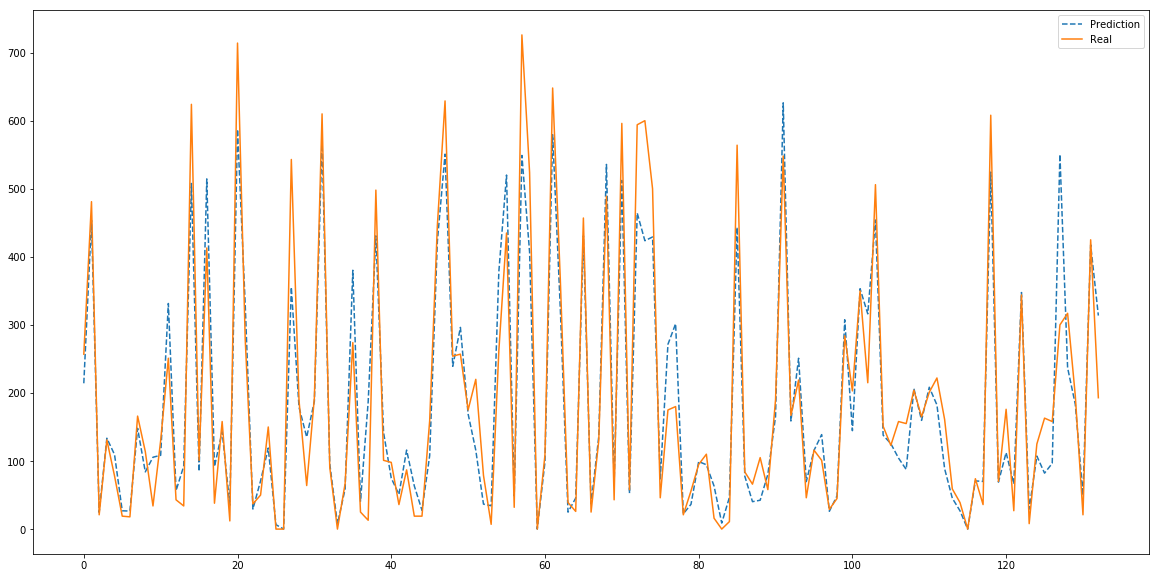

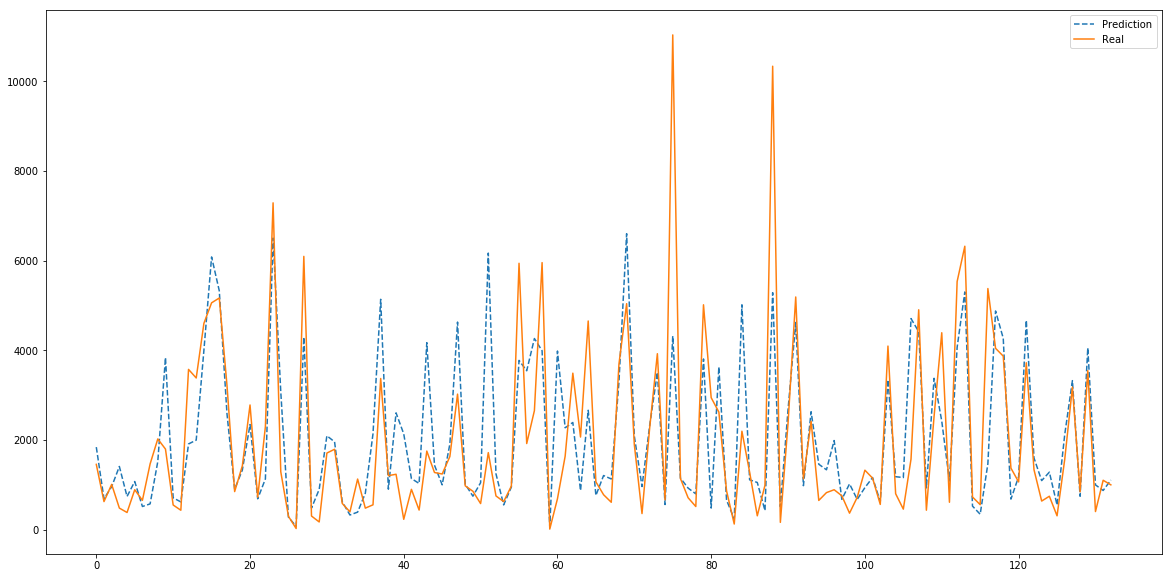

Regressing with 18 features...


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


689966.0112288162


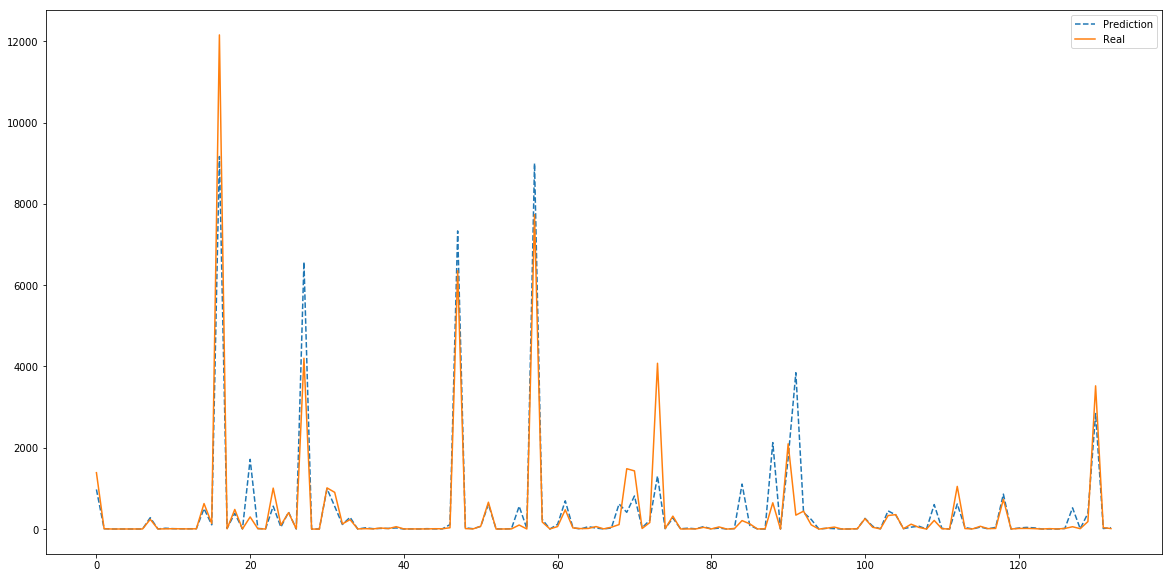

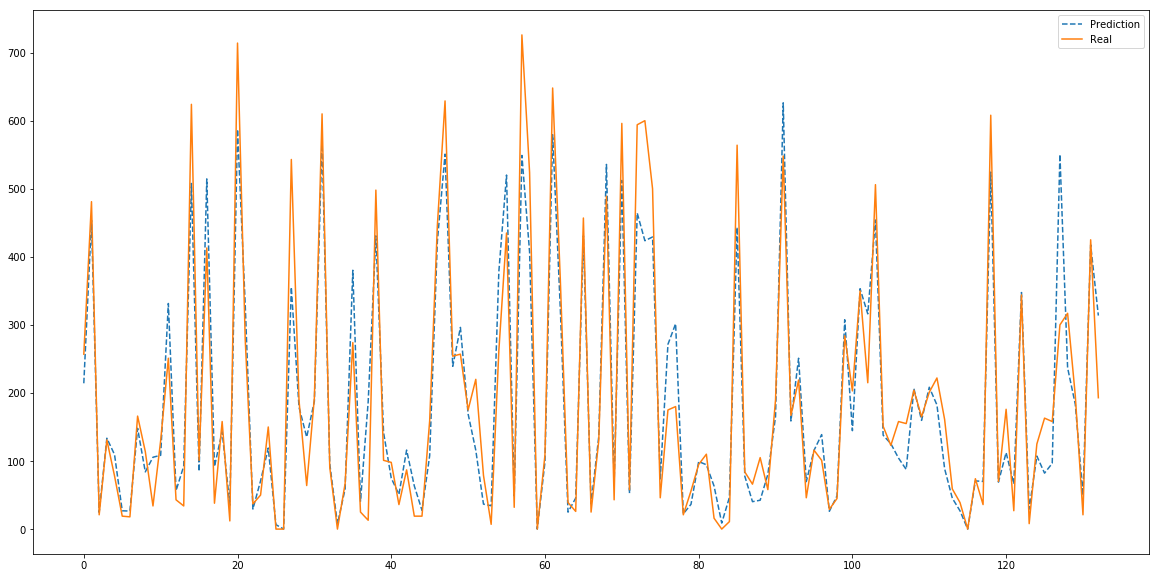

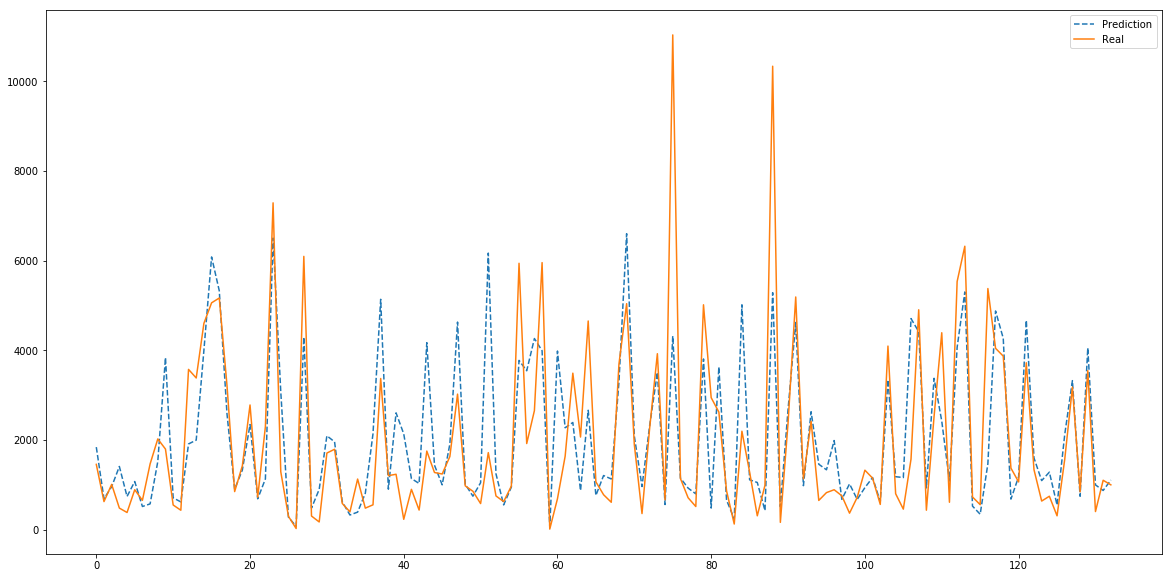

In [36]:
from sklearn.ensemble import RandomForestRegressor

rf_9 = RandomForestRegressor(n_estimators=20, verbose=1, random_state=707, max_features=9)
rf_18 = RandomForestRegressor(n_estimators=20, verbose=1, random_state=707, max_features=18)

print("Regressing with 9 features...")
rf_9.fit(train, train_y)
pred_9 = rf_9.predict(val)
print(np.mean((val_y-pred)**2))

for i in range(3):
    plt.figure(figsize=(20,10))
    plt.plot(pred.T[i], '--', label='Prediction')
    plt.plot(val_y.T[i], label='Real')
    plt.legend()
    plt.show()

print("Regressing with 18 features...")
rf_18.fit(train, train_y)
pred_18 = rf_18.predict(val)
print(np.mean((val_y-pred)**2))

for i in range(3):
    plt.figure(figsize=(20,10))
    plt.plot(pred.T[i], '--', label='Prediction')
    plt.plot(val_y.T[i], label='Real')
    plt.legend()
    plt.show()